# Auxiliary functions for DFTB+ calculations

In this tutorial, we demonstrate some auxiliary functions that could be used with DFTB+ calculations to get some properties relevant for NA-MD simulations, such as energies, orbitals, time-overlaps, etc.


## Table of contents
<a name="toc"></a>
1. [Importing needed libraries](#1)
2. [Calculations of the H and S for a single geometry](#2)
3. [Calculation of the transition density matrix (aka time-overlap matrix)](#3)


### A. Learning objectives

* To be able to conduct DFTB+ calculations using Libra auxiliary functions
* To be able extract the key infromation from the DFTB+ calculations (energies, MOs, etc.)
* To be able to compute time-overlaps with DFTB+ using the doubled molecule approach


### B. Use cases

* [process the DFTB+ calculations results](#use-1)
* [compute wavefunction time-overlaps with DFTB+](#use-2)


### C. Functions

- `libra_py`
  - `packages`
    - `dftbplus`
      - `methods`
        - [`dftb_traj2xyz_traj`](#dftb_traj2xyz_traj-1)
        - [`generic_recipe`](#xyz_traj2gen_sp-1) | [also here](#xyz_traj2gen_sp-2)
        - [`get_dftb_matrices`](#get_dftb_matrices-1)
        - [`get_dftb_ks_energies`](#get_dftb_ks_energies-1)
            

## 1. Importing needed libraries <a name="1"></a>
[Back to TOC](#toc)


In [1]:
import os
import sys

# Fisrt, we add the location of the library to test to the PYTHON path
if sys.platform=="cygwin":
    from cyglibra_core import *
elif sys.platform=="linux" or sys.platform=="linux2":
    from liblibra_core import *
from libra_py.packages.dftbplus import methods as DFTB_methods
from libra_py import units


/home/alexvakimov/SOFTWARE/Conda/envs/libra/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: to-Python converter for std::vector<std::vector<int, std::allocator<int> >, std::allocator<std::vector<int, std::allocator<int> > > > already registered; second conversion method ignored.
  return f(*args, **kwds)
/home/alexvakimov/SOFTWARE/Conda/envs/libra/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: to-Python converter for boost::python::detail::container_element<std::vector<std::vector<int, std::allocator<int> >, std::allocator<std::vector<int, std::allocator<int> > > >, unsigned long, boost::python::detail::final_vector_derived_policies<std::vector<std::vector<int, std::allocator<int> >, std::allocator<std::vector<int, std::allocator<int> > > >, false> > already registered; second conversion method ignored.
  return f(*args, **kwds)
/home/alexvakimov/SOFTWARE/Conda/envs/libra/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: to-Python converter for std::vect

## 2. Calculations of the H and S for a single geometry<a name="2"></a>
[Back to TOC](#toc)

**Important** before running any of the below DFTB+ calculations, make sure you have the DFTB+ package and corresponding parameters installed.

In [2]:
EXE = "/home/alexvakimov/SOFTWARE/dftbplus/dftbplus_22.2/_install/bin/dftb+"
md_file = "adamantane-md.xyz"
sp_gen_file = "x1.gen"
syst_spec = "C"
scf_in_file = "dftb_in_ham1.hsd"
hs_in_file = "dftb_in_ham2.hsd"

Make sure you edit the `dftb_in_ham1.hsd` and `dftb_in_ham2.hsd` files according to your system. 

Generate the "x1.gen" file
<a name=xyz_traj2gen_sp-1></a>

In [3]:
i = 0
DFTB_methods.xyz_traj2gen_sp(md_file, sp_gen_file, i, syst_spec)

Run SCF calculations and generate the charge density for a converged calculations.

The file x1.gen is used as a geometry.

Generate:

* autotest.tag
* band.out
* charges.bin
* detailed.out
* dftb_in.hsd
* dftb_pin.hsd
* eigenvec.bin
* eigenvec.out

In [4]:
os.system(F"cp {scf_in_file} dftb_in.hsd")
os.system( F"{EXE}")

|===============================================================================
|
|  DFTB+ development version (commit: 3f79963e, base: 22.2)
|
|  Copyright (C) 2006 - 2022  DFTB+ developers group
|
|===============================================================================
|
|  When publishing results obtained with DFTB+, please cite the following
|  reference:
|
|  * DFTB+, a software package for efficient approximate density functional
|    theory based atomistic simulations, J. Chem. Phys. 152, 124101 (2020).
|    [doi: 10.1063/1.5143190]
|
|  You should also cite additional publications crediting the parametrization
|  data you use. Please consult the documentation of the SK-files for the
|  references.
|
|===============================================================================

Reading input file 'dftb_in.hsd'
Parser version: 13

--------------------------------------------------------------------------------
***  Converting input from parser version  4 to parser ver

0

Lets clean up the directory a bit - move all the produced files to a separate folder

In [5]:
os.system( "rm -r calc1")
os.system( "mkdir calc1")
files = ["autotest.tag", "band.out", "charges.bin", "detailed.out",
         "dftb_in.hsd", "dftb_pin.hsd", "eigenvec.bin", "eigenvec.out"]
for it in files:
    os.system( "mv %s calc1" % it)

rm: cannot remove 'calc1': No such file or directory


We need the charges.bin, so lets copy it back

Then - just generate the Hamiltonian corresponding to the converged density matrix.

In [6]:
os.system("cp calc1/charges.bin .")

os.system(F"cp {hs_in_file} dftb_in.hsd" )
os.system( F"{EXE}")

|===============================================================================
|
|  DFTB+ development version (commit: 3f79963e, base: 22.2)
|
|  Copyright (C) 2006 - 2022  DFTB+ developers group
|
|===============================================================================
|
|  When publishing results obtained with DFTB+, please cite the following
|  reference:
|
|  * DFTB+, a software package for efficient approximate density functional
|    theory based atomistic simulations, J. Chem. Phys. 152, 124101 (2020).
|    [doi: 10.1063/1.5143190]
|
|  You should also cite additional publications crediting the parametrization
|  data you use. Please consult the documentation of the SK-files for the
|  references.
|
|===============================================================================

Reading input file 'dftb_in.hsd'
Parser version: 13

--------------------------------------------------------------------------------
***  Converting input from parser version  4 to parser ver

ERROR STOP 

Error termination. Backtrace:
#0  0x561ce80c0a8e in __dftbp_common_globalenv_MOD_abortprogram
	at /home/alexvakimov/SOFTWARE/dftbplus/dftbplus_22.2/src/dftbp/common/globalenv.F90:195
#1  0x561ce8190a9a in __dftbp_dftbplus_mainio_MOD_writehsandstop
	at /home/alexvakimov/SOFTWARE/dftbplus/dftbplus_22.2/src/dftbp/dftbplus/mainio.F90:4166
#2  0x561ce8177547 in __dftbp_dftbplus_main_MOD_processgeometry
	at /home/alexvakimov/SOFTWARE/dftbplus/dftbplus_22.2/src/dftbp/dftbplus/main.F90:1262
#3  0x561ce817c351 in __dftbp_dftbplus_main_MOD_rundftbplus
	at /home/alexvakimov/SOFTWARE/dftbplus/dftbplus_22.2/src/dftbp/dftbplus/main.F90:236
#4  0x561ce80bfb85 in dftbplus
	at /home/alexvakimov/SOFTWARE/dftbplus/dftbplus_22.2/app/dftb+/dftbplus.F90:35
#5  0x561ce80bafae in main
	at /home/alexvakimov/SOFTWARE/dftbplus/dftbplus_22.2/app/dftb+/dftbplus.F90:11


256

As before - lets move all the generated files into another directory

In [7]:
os.system( "rm -r calc2")
os.system( "mkdir calc2")
files = ["band.out", "charges.bin", "detailed.out",
         "dftb_in.hsd", "dftb_pin.hsd", "hamsqr1.dat", "oversqr.dat", "x1.gen"]
for it in files:
    os.system( "mv %s calc2" % it)

rm: cannot remove 'calc2': No such file or directory


Read the converged Hamiltonian - constructed using the converged charge density

Read the AO overlap matrix
<a name="get_dftb_matrices-1"></a><a name="use-1"></a>

In [8]:
Hi = DFTB_methods.get_dftb_matrices("calc2/hamsqr1.dat")
Si = DFTB_methods.get_dftb_matrices("calc2/oversqr.dat")

In [9]:
# Get the dimensions
ao_sz = Hi[0].num_of_cols
mo_sz = ao_sz

ao_act_sp = list(range(0, ao_sz))
mo_act_sp = list(range(0, mo_sz))

print(F"ao_sz = {ao_sz}, ao_act_sp = {ao_act_sp}")
print(F"mo_sz = {mo_sz}, mo_act_sp = {mo_act_sp}")

ao_sz = 56, ao_act_sp = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55]
mo_sz = 56, mo_act_sp = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55]


Extract submatrix of the orbitals of interest

Solve the eigenvalue problem and get the orbitals

In [10]:
# Extract the sub-matrix of interest
H_sub = CMATRIX(ao_sz, mo_sz)
pop_submatrix(Hi[0], H_sub, ao_act_sp, mo_act_sp)  # last element #0 = gamma-point

# Get the orbitals
Ei = CMATRIX(mo_sz, mo_sz)
MOi = CMATRIX(ao_sz, mo_sz)
solve_eigen(H_sub, Si[0], Ei, MOi, 0)     # last element #0 = gamma-point

Let's print out the orbitals and compare to what the DFTB+ gives

In [11]:
MOi.show_matrix("MOs.txt")

In [12]:
f = open("MO.0.txt", "w")

for i in range(ao_sz):
    f.write("%i %10.8f %10.8f \n" % (i,  MOi.get(i,0).real,  MOi.get(i,0).imag) )
f.close()

In [13]:
files = ["MOs.txt", "MO.0.txt"]
for it in files:
    os.system( "mv %s calc2" % it)

One can then compare the content of the generated files (feel free to change the index of the MO) to the content of the file calc1/eigenvec.out

## 3. Calculation of the transition density matrix (aka time-overlap matrix)<a name="3"></a>
[Back to TOC](#toc)

The calculation is based on computing the overlap of the MOs for two (usually nearby) geometries.

This approach is based on the doubled-geometry method. We basically make a "super-molecule" that is composed of the two geometries and conduct non-self-consistent calculation on it to only obtain the overlap matrix. The resulting 2N x 2N matrix is composed of the N x N blocks, where N is the number of AOs. The diagonal block contains the normal AO overlaps of the geometries i and i+1, while the off-diagonal blocks contain the overlaps of the AOs for the geometries i and i+1.

Generate "x2.gen" file

Note that the file is of the doubled size compared to x1.gen we generated before.

**Make sure you adapt the `dftb_in_overlaps.hsd` to your system**
<a name=xyz_traj2gen_sp-2></a><a name="use-2"></a>

In [14]:
ovlp_gen_file = "x2.gen"
ovlp_in_file = "dftb_in_overlaps.hsd"

i = 0
DFTB_methods.xyz_traj2gen_ovlp(md_file, ovlp_gen_file, i, i+1, syst_spec)

Run the calculations on the super-molecule. Only to generate the overlap matrix in the AO basis.


**Important**  [see here](https://compchem-cybertraining.github.io/Cyber_Training_Workshop_2022/files/DaehoHan/pyUNIxMD+DFTB.pdf)

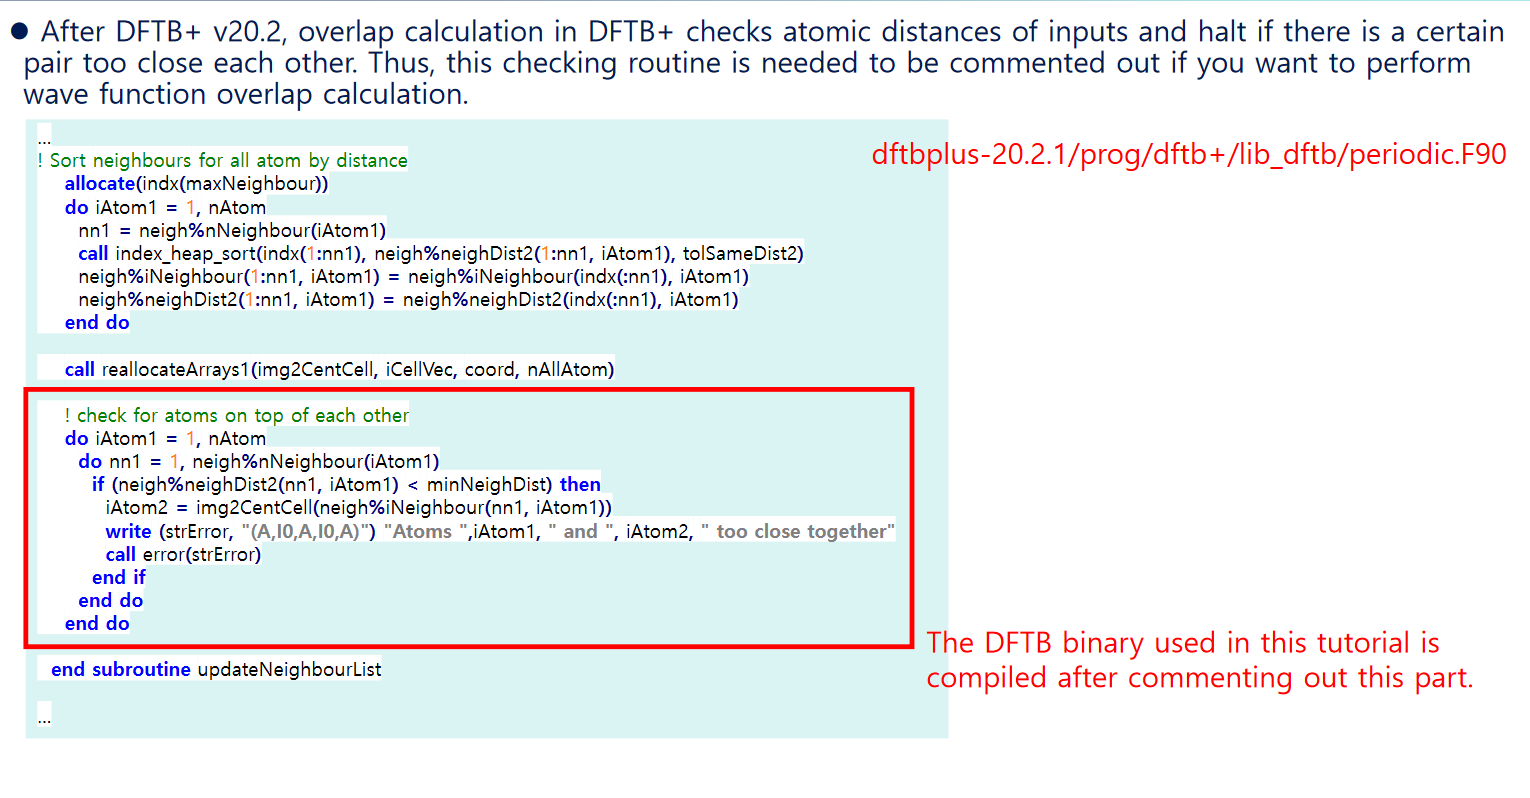

In version 22.2, the relevant correction would need to be done in a slightly different place, in file: `dftbplus_22.2/src/dftbp/dftb`

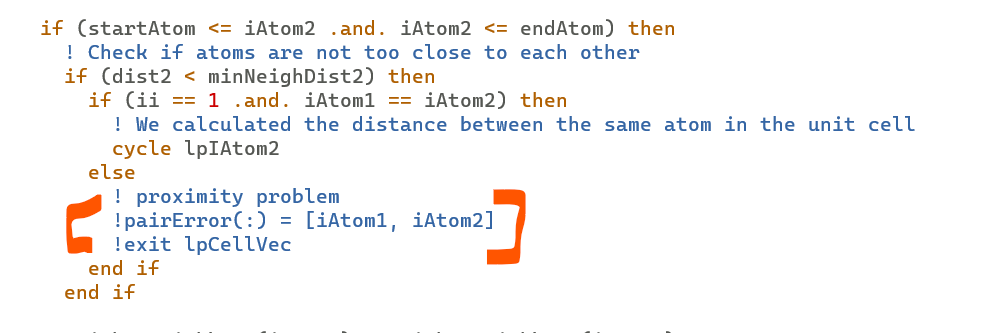

In [15]:
os.system(F"cp {ovlp_in_file} dftb_in.hsd")
os.system(F"{EXE}")

|===============================================================================
|
|  DFTB+ development version (commit: 3f79963e, base: 22.2)
|
|  Copyright (C) 2006 - 2022  DFTB+ developers group
|
|===============================================================================
|
|  When publishing results obtained with DFTB+, please cite the following
|  reference:
|
|  * DFTB+, a software package for efficient approximate density functional
|    theory based atomistic simulations, J. Chem. Phys. 152, 124101 (2020).
|    [doi: 10.1063/1.5143190]
|
|  You should also cite additional publications crediting the parametrization
|  data you use. Please consult the documentation of the SK-files for the
|  references.
|
|===============================================================================

Reading input file 'dftb_in.hsd'
Parser version: 13

--------------------------------------------------------------------------------
***  Converting input from parser version  4 to parser ver

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
ERROR STOP 

Error termination. Backtrace:
#0  0x557aea8d1a8e in __dftbp_common_globalenv_MOD_abortprogram
	at /home/alexvakimov/SOFTWARE/dftbplus/dftbplus_22.2/src/dftbp/common/globalenv.F90:195
#1  0x557aea9a1a9a in __dftbp_dftbplus_mainio_MOD_writehsandstop
	at /home/alexvakimov/SOFTWARE/dftbplus/dftbplus_22.2/src/dftbp/dftbplus/mainio.F90:4166
#2  0x557aea988547 in __dftbp_dftbplus_main_MOD_processgeometry
	at /home/alexvakimov/SOFTWARE/dftbplus/dftbplus_22.2/src/dftbp/dftbplus/main.F90:1262
#3  0x557aea98d351 in __dftbp_dftbplus_main_MOD_rundftbplus
	at /home/alexvakimov/SOFTWARE/dftbplus/dftbplus_22.2/src/dftbp/dftbplus/main.F90:236
#4  0x557aea8d0b85 in dftbplus
	at /home/alexvakimov/SOFTWARE/dftbplus/dftbplus_22.2/app/dftb+/dftbplus.F90:35
#5  0x557aea8cbfae in main
	at /home/alexvakimov/SOFTWARE/dftbplus/dftbplus_22.2/app/dftb+/dftbplus.F90:11


256

As before - organize the generated files into a separate directory

In [16]:
os.system( "rm -r calc3")
os.system( "mkdir calc3")
files = ["band.out", "detailed.out", "dftb_in.hsd", "dftb_pin.hsd", "hamsqr1.dat", "oversqr.dat", "x2.gen"]
for it in files:
    os.system( "mv %s calc3" % it)

rm: cannot remove 'calc3': No such file or directory


Read the supermatrix and split it into blocks:

In [17]:
St = DFTB_methods.get_dftb_matrices("calc3/oversqr.dat")

ao_sz2 = int(St[0].num_of_cols/2)
print(F"ao_sz2 = {ao_sz2}")

block0 = list(range(0, ao_sz2))
block1 = list(range(ao_sz2, 2*ao_sz2))


S00 = CMATRIX(ao_sz2, ao_sz2)
S01 = CMATRIX(ao_sz2, ao_sz2)
S10 = CMATRIX(ao_sz2, ao_sz2)
S11 = CMATRIX(ao_sz2, ao_sz2)

pop_submatrix(St[0], S00, block0, block0) 
pop_submatrix(St[0], S01, block0, block1) 
pop_submatrix(St[0], S10, block1, block0) 
pop_submatrix(St[0], S11, block1, block1) 

ao_sz2 = 56


In [18]:
S00.real().show_matrix("S00.txt")
S01.real().show_matrix("S01.txt")
S10.real().show_matrix("S10.txt")
S11.real().show_matrix("S11.txt")

In [19]:
files = ["S00.txt", "S01.txt", "S10.txt", "S11.txt"]
for it in files:
    os.system( "mv %s calc3" % it)

## 4. Analysis of the MD trajectories

Generate the x1.gen file

In [20]:
i = 0
DFTB_methods.xyz_traj2gen_sp(md_file, sp_gen_file, i, syst_spec)

Run molecular dynamics

In [21]:
md_in_file = "dftb_in_md.hsd"
os.system(F"cp {md_in_file} dftb_in.hsd")
os.system(F"{EXE}")

|===============================================================================
|
|  DFTB+ development version (commit: 3f79963e, base: 22.2)
|
|  Copyright (C) 2006 - 2022  DFTB+ developers group
|
|===============================================================================
|
|  When publishing results obtained with DFTB+, please cite the following
|  reference:
|
|  * DFTB+, a software package for efficient approximate density functional
|    theory based atomistic simulations, J. Chem. Phys. 152, 124101 (2020).
|    [doi: 10.1063/1.5143190]
|
|  You should also cite additional publications crediting the parametrization
|  data you use. Please consult the documentation of the SK-files for the
|  references.
|
|===============================================================================

Reading input file 'dftb_in.hsd'
Parser version: 13

--------------------------------------------------------------------------------
***  Converting input from parser version  4 to parser ver


Total Energy:                      -23.1628801076 H         -630.2940 eV
Extrapolated to 0K:                -23.1628801076 H         -630.2940 eV
Total Mermin free energy:          -23.1628801076 H         -630.2940 eV
Force related energy:              -23.1628801076 H         -630.2940 eV

>> Charges saved for restart in charges.bin
MD Temperature:                      0.0005310569 H          167.6943 K
MD Kinetic Energy:                   0.0199146345 H            0.5419 eV
Total MD Energy:                   -23.1429654731 H         -629.7521 eV

--------------------------------------------------------------------------------

***  Geometry step: 5

 iSCC Total electronic   Diff electronic      SCC error    
    1   -0.22891728E+02    0.00000000E+00    0.11551842E-01
    2   -0.22909766E+02   -0.18037779E-01    0.84100463E-02
    3   -0.22909774E+02   -0.77262705E-05    0.13592442E-02
    4   -0.22909780E+02   -0.60138276E-05    0.12595978E-03
    5   -0.22909780E+02   -0.14731759E

0

Extract orbital energies for desired orbital range:
<a name="get_dftb_ks_energies-1"></a>

In [22]:
os.system( "rm -r calc4")
os.system( "mkdir calc4")
files = ["autotest.tag", "band.out", "charges.bin", "detailed.out", "dftb_in.hsd", "dftb_pin.hsd",
         "eigenvec.bin", "eigenvec.out", "geo_end.gen", "geo_end.xyz", "md.out", "x1.gen"]
for it in files:
    os.system( "mv %s calc4" % it)

rm: cannot remove 'calc4': No such file or directory


In [23]:
E = DFTB_methods.get_dftb_ks_energies({"min_band":28, "max_band":29, "logfile_name":"calc4/band.out"})
print(E)

[-0.23699974  0.21590533]


Convert the DFTB+ produced MD trajectory into a more standard one
<a name="dftb_traj2xyz_traj-1"></a>

In [24]:
DFTB_methods.dftb_traj2xyz_traj("calc4/geo_end.xyz", "calc4/md.xyz")